In [1]:
%%html
<style>
table {float:left}
</style>

| Models   | Simulations length | Average period |
|  :---    | :----              | :---           |
| OsloCTM3 | 20 years           |   year 20      |
| WACCM6   | 18 years           | last 5 years   |
| INCA     | 10 years           | last 3 years   |
| GFDL*    | 50 years           | last 40 years  | 


In [2]:

import numpy as np
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt
%matplotlib inline
import uncertainties
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

In [3]:
path = r"./input/"
outputpath= r"./output/"

In [4]:
#AGWP100_CO2 [mW yr m-2 Tg-1] Source: REF.
agwp100_CO2 = 0.09170

#CH4 tau_strat[yr] Source: REF
tau_strat = 120.0

#CH4 tau_soil [yr] Source: REF
tau_soil = 160.0

#Specific RF for CH4 [mW m-2 ppb-1] Etminan et al., 2016
spec_rf_ch4 = 0.44300

In [5]:
adjust_drydep = True
if(adjust_drydep):
    drydep = 80.0
    outputpath = outputpath + 'drydep_'+ f'{drydep:.0f}_'

In [6]:
unc_atmloss = 0.01
unc_drydep = 0.01




In [7]:
file = 'H2_burden.txt'
df_h2_burden = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_h2_burden.loc['10H2']-df_h2_burden.loc['CTRL']
delta.name = 'deltaH2'
df_h2_burden = df_h2_burden.append(delta)
df_h2_burden

/tmp/ipykernel_5112/3513702663.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_burden = df_h2_burden.append(delta)


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,196,195,194,192,209
10H2,215,213,213,656,240
10CH4,197,195,195,NaN,NaN
deltaH2,18.7,18.7,18.6,464,30.8


In [8]:
file = 'H2_drydep.txt'
df_h2_drydep = pd.read_csv(path + file, sep=';',index_col=0,header=0)
df_h2_drydep

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,59.5,73.0,52.1,54.7,58.4
10H2,65.5,80.3,57.2,204,67.8
10CH4,59.5,73.0,52.1,NaN,0.00


In [9]:
if(adjust_drydep):
    print('NB drydep adjusted')
    
    #Adjust by the relative adjustment in the control simulations
    adjust = drydep/df_h2_drydep.loc['CTRL']
    df_h2_drydep = df_h2_drydep*adjust
    
df_h2_drydep
df_h2_drydep_unc = df_h2_drydep*unc_drydep
df_h2_drydep_u = unumpy.uarray(df_h2_drydep, np.nan_to_num(df_h2_drydep_unc))
df_h2_drydep_udf = pd.DataFrame(df_h2_drydep_u, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['CTRL','10H2','10CH4'])

df_h2_drydep_udf


NB drydep adjusted


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
CTRL,80.0+/-0.8,80.0+/-0.8,80.0+/-0.8,80.0+/-0.8,80.0+/-0.8
10H2,88.0+/-0.9,88.0+/-0.9,87.9+/-0.9,298.1+/-3.0,92.9+/-0.9
10CH4,80.0+/-0.8,80.0+/-0.8,80.0+/-0.8,nan+/-0,0.0+/-0


In [10]:
file = 'H2_atm_loss.txt'

df_h2_atmloss = pd.read_csv(path + file, sep=';',index_col=0,header=0)

df_h2_atmloss_unc = df_h2_atmloss*unc_atmloss
df_h2_atmloss_u = unumpy.uarray(df_h2_atmloss,  np.nan_to_num(df_h2_atmloss_unc))
df_h2_atmloss_udf = pd.DataFrame(df_h2_atmloss_u, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['CTRL','10H2','10CH4'])
df_h2_atmloss_udf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
CTRL,28.39+/-0.28,29.02+/-0.29,22.13+/-0.22,22.12+/-0.22,30.07+/-0.30
10H2,30.98+/-0.31,31.66+/-0.32,24.15+/-0.24,69.4+/-0.7,34.32+/-0.34
10CH4,27.64+/-0.28,28.15+/-0.28,21.63+/-0.22,nan+/-0,0.0+/-0


In [11]:
df_h2_loss_udf = df_h2_atmloss_udf + df_h2_drydep_udf
df_h2_loss_udf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
CTRL,108.4+/-0.8,109.0+/-0.9,102.1+/-0.8,102.1+/-0.8,110.1+/-0.9
10H2,119.0+/-0.9,119.7+/-0.9,112.1+/-0.9,367.5+/-3.1,127.2+/-1.0
10CH4,107.6+/-0.8,108.2+/-0.8,101.6+/-0.8,nan+/-0,0.0+/-0


In [12]:
file = 'H2_atm_prod.txt'
df_h2_atmprod = pd.read_csv(path + file, sep=';',index_col=0,header=0)
df_h2_atmprod

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,56.3,33.9,46.7,44.7,56.2
10H2,56.2,33.8,46.6,43.1,56.1
10CH4,59.2,36.4,48.9,NaN,0.00


In [13]:
#df_h2_estemis = df_h2_atmloss.loc['CTRL'] + df_h2_drydep.loc['CTRL'] - df_h2_atmprod.loc['CTRL']
df_h2_estemis = df_h2_atmloss_udf.loc['CTRL'] + df_h2_drydep.loc['CTRL'] - df_h2_atmprod.loc['CTRL']

df_h2_estemis

OSLOCTM3        52.07+/-0.28
WACCM6-2deg     75.08+/-0.29
INCA            55.45+/-0.22
GFDL-emi        57.44+/-0.22
OSLOCTM3-emi    53.84+/-0.30
Name: CTRL, dtype: object

In [14]:
file = 'H2_surfconc.txt'
df_h2_surfconc = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_h2_surfconc.loc['10H2']-df_h2_surfconc.loc['CTRL']
delta.name = 'deltaH2'
df_h2_surfconc = df_h2_surfconc.append(delta)
df_h2_surfconc

/tmp/ipykernel_5112/4036563764.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_surfconc = df_h2_surfconc.append(delta)


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,532,532,532,534,567
10H2,585,585,585,"1,880",656
deltaH2,53.2,53.2,53.2,"1,346",88.7


In [15]:
df_h2_lifetime = (df_h2_burden.drop('deltaH2')/((df_h2_loss_udf).clip(1e-9)))
df_h2_lifetime

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,1.810+/-0.014,1.785+/-0.014,1.904+/-0.015,1.877+/-0.015,1.898+/-0.015
10H2,1.806+/-0.014,1.782+/-0.014,1.900+/-0.015,1.784+/-0.015,1.884+/-0.015
10CH4,1.829+/-0.014,1.805+/-0.014,1.918+/-0.016,NaN,NaN


In [16]:
df_h2_atm_lifetime = df_h2_burden.drop('deltaH2')/df_h2_atmloss_udf.clip(1e-9)
df_h2_atm_lifetime

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,6.91+/-0.07,6.70+/-0.07,8.79+/-0.09,8.66+/-0.09,6.95+/-0.07
10H2,6.94+/-0.07,6.73+/-0.07,8.82+/-0.09,9.44+/-0.09,6.98+/-0.07
10CH4,7.12+/-0.07,6.93+/-0.07,9.01+/-0.09,NaN,NaN


In [17]:
df_h2_flux = df_h2_burden.drop('deltaH2')/df_h2_lifetime
#Add delta flux 10H2:
delta = df_h2_flux.loc['10H2']-df_h2_flux.loc['CTRL']
delta.name = 'deltaH2'
df_h2_flux = df_h2_flux.append(delta)
#Add delta flux 10CH4:
delta = df_h2_flux.loc['10CH4']-df_h2_flux.loc['CTRL']
delta.name = 'deltaCH4'
df_h2_flux = df_h2_flux.append(delta)
df_h2_flux


/tmp/ipykernel_5112/3020540624.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_flux = df_h2_flux.append(delta)
/tmp/ipykernel_5112/3020540624.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_flux = df_h2_flux.append(delta)


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,108.4+/-0.8,109.0+/-0.9,102.1+/-0.8,102.1+/-0.8,110.1+/-0.9
10H2,119.0+/-0.9,119.7+/-0.9,112.1+/-0.9,367.5+/-3.1,127.2+/-1.0
10CH4,107.6+/-0.8,108.2+/-0.8,101.6+/-0.8,NaN,NaN
deltaH2,10.6+/-1.3,10.6+/-1.3,10.0+/-1.2,265.4+/-3.2,17.2+/-1.3
deltaCH4,-0.7+/-1.2,-0.9+/-1.2,-0.5+/-1.2,nan+/-0.8300286622045049,nan+/-0.8546328419581509


In [18]:
file = 'CH4_burden.txt'
df_ch4_burden = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_ch4_burden.loc['10CH4']-df_ch4_burden.loc['CTRL']
delta.name = 'deltaCH4'
df_ch4_burden = df_ch4_burden.append(delta)
df_ch4_burden

/tmp/ipykernel_5112/1947808632.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_burden = df_ch4_burden.append(delta)


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,"4,995","5,003","4,994","4,935","4,995"
10H2,"4,995","5,003","4,995","4,935","4,995"
10CH4,"5,496","5,505","5,494",NaN,NaN
deltaCH4,501,502,500,NaN,NaN


In [19]:
file = 'CH4_loss.txt'
df_ch4_loss = pd.read_csv(path + file, sep=';',index_col=0,header=0)
df_ch4_loss

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,683,727,550,582,681
10H2,680,724,547,537,677
10CH4,728,772,588,NaN,NaN


In [20]:
file = 'CH4_surfconc.txt'
df_ch4_surfconc = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_ch4_surfconc.loc['10CH4']-df_ch4_surfconc.loc['CTRL']
delta.name = 'deltaCH4'
df_ch4_surfconc = df_ch4_surfconc.append(delta)
df_ch4_surfconc

/tmp/ipykernel_5112/3092691110.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_surfconc = df_ch4_surfconc.append(delta)


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,"1,813","1,808","1,813","1,804","1,813"
10CH4,"1,994","1,989","1,994",NaN,NaN
deltaCH4,181,181,181,NaN,NaN


In [21]:
df_ch4_lifetime = df_ch4_burden.drop('deltaCH4')/df_ch4_loss
df_ch4_lifetime

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,7.31,6.88,9.09,8.48,7.33
10H2,7.34,6.91,9.12,9.19,7.38
10CH4,7.55,7.13,9.35,NaN,NaN


In [22]:
df_ch4_tot_lifetime = 1.0/(1.0/df_ch4_lifetime + 1.0/tau_strat + 1.0/tau_soil)
df_ch4_tot_lifetime

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,6.61,6.25,8.02,7.54,6.62
10H2,6.63,6.28,8.05,8.10,6.66
10CH4,6.80,6.46,8.23,NaN,NaN


In [23]:
df_ch4_flux = df_ch4_burden.drop('deltaCH4')/df_ch4_tot_lifetime
#Add delta CH4 flux 10H2
delta = df_ch4_flux.loc['10H2']-df_ch4_flux.loc['CTRL']
delta.name = 'deltaH2'
df_ch4_flux = df_ch4_flux.append(delta)
#Add delta CH4 flux 10CH4
delta = df_ch4_flux.loc['10CH4']-df_ch4_flux.loc['CTRL']
delta.name = 'deltaCH4'
df_ch4_flux = df_ch4_flux.append(delta)
df_ch4_flux


/tmp/ipykernel_5112/4243536324.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_flux = df_ch4_flux.append(delta)
/tmp/ipykernel_5112/4243536324.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_flux = df_ch4_flux.append(delta)


,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
CTRL,756,800,622,654,754
10H2,753,797,620,609,750
10CH4,808,852,668,NaN,NaN
deltaH2,-2.67,-3.28,-2.10,-45.2,-4.38
deltaCH4,52.4,52.4,45.3,NaN,NaN


In [24]:
file = 'ozone_du_trop.txt'
df_ozone_du_trop = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_trop

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
10H2,0.04,0.03,0.03,0.73,0.06
10CH4,0.83,0.88,0.54,0.76,NaN


In [25]:
file = 'ozone_du_strat.txt'
df_ozone_du_strat = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_strat

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
10H2,-0.03,0.00,-0.03,-0.23,0.02
10CH4,0.83,0.83,0.35,1.07,NaN


In [26]:
file = 'ozone_du_strat_6060.txt'
df_ozone_du_strat_6060 = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_strat_6060

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
10H2,0.00,0.00,-0.02,-0.22,NaN
10CH4,0.62,0.66,0.28,0.68,NaN


In [27]:
file = 'ozone_du_strat_gt60.txt'
df_ozone_du_strat_gt60 = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_strat_gt60

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
10H2,0.00,0.00,-0.01,-0.01,NaN
10CH4,0.23,0.17,0.08,0.40,NaN


In [28]:
file = 'ozone_rf.txt'
df_ozone_rf = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_rf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
10H2,1.86,1.73,1.12,34.0,3.08
10CH4,41.0,42.9,22.6,37.6,NaN


In [29]:
df_ozone_rf['OSLOCTM3-emi'].loc['10CH4'] = df_ozone_rf['OSLOCTM3'].loc['10CH4'] 
df_ozone_rf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
Scenario,,,,,
10H2,1.86,1.73,1.12,34.0,3.08
10CH4,41.0,42.9,22.6,37.6,41.0


In [30]:
file = 'H2O_rf.txt'
df_h2o_rf = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_h2o_rf

,OSLOCTM3,WACCM6-2deg,INCA,OSLOCTM3-emi
Scenario,,,,
10H2,1.48,0.51,0.53,1.33
10CH4,10.1,3.76,4.58,NaN


In [31]:
df_h2o_rf['OSLOCTM3-emi'].loc['10CH4'] = df_h2o_rf['OSLOCTM3'].loc['10CH4'] 
df_h2o_rf

,OSLOCTM3,WACCM6-2deg,INCA,OSLOCTM3-emi
Scenario,,,,
10H2,1.48,0.51,0.53,1.33
10CH4,10.1,3.76,4.58,10.1


In [32]:
file = 'H2O_rf_gfdl.txt'
h2o_rf_gfdl = pd.read_csv(path + file, sep=',',index_col=0,header=0)
h2o_rf_gfdl

,GFDL
H2 [mW m-2],32.6
H2+CH4 [mW m-2],51.7


In [33]:
df_surf_h2_per_h2_flux = df_h2_surfconc.loc['deltaH2']/df_h2_flux.loc['deltaH2']
df_surf_h2_per_h2_flux.name = 'surf_h2_per_h2_flux'
df_surf_h2_per_h2_flux

OSLOCTM3          5.0+/-0.6
WACCM6-2deg       5.0+/-0.6
INCA              5.3+/-0.7
GFDL-emi        5.07+/-0.06
OSLOCTM3-emi      5.2+/-0.4
Name: surf_h2_per_h2_flux, dtype: object

In [34]:
df_ch4_flux_per_h2_flux = -1.0*df_ch4_flux.loc['deltaH2']/df_h2_flux.loc['deltaH2']
df_ch4_flux_per_h2_flux.name = 'ch4_flux_per_h2_flux'
df_ch4_flux_per_h2_flux

OSLOCTM3          0.252+/-0.030
WACCM6-2deg         0.31+/-0.04
INCA              0.211+/-0.026
GFDL-emi        0.1702+/-0.0020
OSLOCTM3-emi      0.255+/-0.019
Name: ch4_flux_per_h2_flux, dtype: object

In [35]:
df_surf_ch4_per_ch4_flux =  df_ch4_surfconc.loc['deltaCH4']/df_ch4_flux.loc['deltaCH4']
df_surf_ch4_per_ch4_flux.name = 'surf_ch4_per_ch4_flux'
df_surf_ch4_per_ch4_flux

OSLOCTM3       3.46
WACCM6-2deg    3.45
INCA           4.00
GFDL-emi        NaN
OSLOCTM3-emi    NaN
Name: surf_ch4_per_ch4_flux, dtype: float64

In [36]:
df_surf_ch4_per_ch4_flux['OSLOCTM3-emi'] = df_surf_ch4_per_ch4_flux['OSLOCTM3']
df_surf_ch4_per_ch4_flux

OSLOCTM3       3.46
WACCM6-2deg    3.45
INCA           4.00
GFDL-emi        NaN
OSLOCTM3-emi   3.46
Name: surf_ch4_per_ch4_flux, dtype: float64

In [37]:
df_surf_ch4_per_h2_flux = df_surf_ch4_per_ch4_flux*df_ch4_flux_per_h2_flux
df_surf_ch4_per_h2_flux.name = 'surf_ch4_per_h2_flux'

#Add GFDL:
#Increase in surface concentration CH4:
#1808 to 2005 ppbv (REF Paolot)
df_surf_ch4_per_h2_flux['GFDL-emi']= (2005.-1808.)/df_h2_flux['GFDL-emi'].loc['deltaH2']
df_surf_ch4_per_h2_flux

OSLOCTM3          0.87+/-0.10
WACCM6-2deg       1.06+/-0.13
INCA              0.84+/-0.10
GFDL-emi        0.742+/-0.009
OSLOCTM3-emi      0.88+/-0.07
Name: surf_ch4_per_h2_flux, dtype: object

In [38]:
df_h2_flux_per_ch4_flux = -1.0*df_h2_flux.loc['deltaCH4']/df_ch4_flux.loc['deltaCH4']
df_h2_flux_per_ch4_flux.name = 'h2_flux_per_ch4_flux'
df_h2_flux_per_ch4_flux

OSLOCTM3        0.014+/-0.023
WACCM6-2deg     0.016+/-0.023
INCA            0.011+/-0.026
GFDL-emi            nan+/-nan
OSLOCTM3-emi        nan+/-nan
Name: h2_flux_per_ch4_flux, dtype: object

In [39]:
df_h2_flux_per_ch4_flux['OSLOCTM3-emi'] = df_h2_flux_per_ch4_flux['OSLOCTM3']
df_h2_flux_per_ch4_flux

OSLOCTM3        0.014+/-0.023
WACCM6-2deg     0.016+/-0.023
INCA            0.011+/-0.026
GFDL-emi            nan+/-nan
OSLOCTM3-emi    0.014+/-0.023
Name: h2_flux_per_ch4_flux, dtype: object

In [40]:
df_h2_agwp_ch4 = df_surf_ch4_per_h2_flux*spec_rf_ch4
df_h2_agwp_ch4.name = 'h2_agwp_ch4'


#agwp_ch4 = RF per flux H2 (For the per flux table)
df_ch4_rf_per_h2_flux = df_surf_ch4_per_h2_flux*spec_rf_ch4
df_ch4_rf_per_h2_flux.name = 'ch4_rf_per_h2_flux'

In [41]:
antmod = len(df_h2_agwp_ch4.index)
df_h2_gwp = pd.DataFrame(np.empty([5,antmod])*np.nan,columns=df_h2_agwp_ch4.index,
                         index=['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind'])
df_h2_gwp_u = pd.DataFrame(np.empty([5,5]), columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind'])
df_h2_gwp_ua = unumpy.uarray(df_h2_gwp_u, 0)

df_h2_gwp_ua
df_h2_gwp_udf = pd.DataFrame(df_h2_gwp_ua, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind'])


In [42]:
df_h2_gwp_udf.loc['CH4'] = df_h2_agwp_ch4/agwp100_CO2
df_h2_gwp_udf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
O3,(2.767623778885857+/-0)e-316,0.0+/-0,(6.013470016999069+/-0)e-154,(9.93868795967888+/-0)e+73,(6.013469532346091+/-0)e-154
CH4,4.2+/-0.5,5.1+/-0.6,4.1+/-0.5,3.59+/-0.04,4.26+/-0.32
strat H2O,(9.819255917262645+/-0)e+25,(6.013469531216656+/-0)e-154,(6.013470016999094+/-0)e-154,(3.523379244718934+/-0)e+246,(3.487750597089634+/-0)e-259
O3 CH4ind,(6.32300943928094+/-0)e+233,(6.465722853802729+/-0)e+170,(1.7040955379029223+/-0)e+16,(1.4264442253343372+/-0)e-153,(2.45+/-0)e-322
strat H2O CH4ind,(6.92907737644+/-0)e-310,(6.92907737644+/-0)e-310,(2.164821454448617+/-0)e-27,(2.652064150236589+/-0)e-258,(1.0297029702970297+/-0)e-321


In [43]:
df_h2_agwp_h2o = df_h2o_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_h2_agwp_h2o['GFDL-emi'] = h2o_rf_gfdl['GFDL'].loc['H2+CH4 [mW m-2]']/df_h2_flux['GFDL-emi'].loc['deltaH2']
df_h2_agwp_h2o.name = 'h2_agwp_h2o'

#NBNB GFDL methane induced is included.

In [44]:
#Add to the flux table
df_h2o_rf_per_h2_flux = df_h2o_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_h2o_rf_per_h2_flux.name= 'h2o_rf_per_h2_flux'
df_h2o_rf_per_h2_flux['GFDL-emi'] = h2o_rf_gfdl['GFDL'].loc['H2 [mW m-2]']/df_h2_flux['GFDL-emi'].loc['deltaH2']

#Strat H2O RF per methane flux (Move this to the methane part?)
df_h2o_rf_per_ch4_flux = df_h2o_rf.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_h2o_rf_per_ch4_flux.name = 'h2o_rf_per_ch4_flux'


In [45]:
df_h2o_rf_per_ch4_flux['OSLOCTM3-emi'] = df_h2o_rf_per_ch4_flux['OSLOCTM3']
df_h2o_rf_per_ch4_flux

GFDL-emi        NaN
INCA           0.10
OSLOCTM3       0.19
OSLOCTM3-emi   0.19
WACCM6-2deg    0.07
Name: h2o_rf_per_ch4_flux, dtype: float64

In [46]:
df_h2_agwp_h2o/agwp100_CO2

GFDL-emi        2.126+/-0.025
INCA              0.58+/-0.07
OSLOCTM3          1.52+/-0.18
OSLOCTM3-emi      0.84+/-0.06
WACCM6-2deg       0.53+/-0.06
Name: h2_agwp_h2o, dtype: object

In [47]:
df_h2_gwp_udf.loc['strat H2O'] = df_h2_agwp_h2o/agwp100_CO2

In [48]:
df_h2_agwp_o3 = df_ozone_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_h2_agwp_o3.name = 'h2_agwp_o3'

#For GFDL-emi include the methane induced part.
df_h2_agwp_o3['GFDL-emi'] = (df_ozone_rf['GFDL-emi'].loc['10H2']+df_ozone_rf['GFDL-emi'].loc['10CH4'])/df_h2_flux['GFDL-emi'].loc['deltaH2']


In [49]:
#Similar, but use only the H2 Ozone RF for GFDL. To be used in the table:
df_ozone_rf_per_h2_flux = df_ozone_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_ozone_rf_per_h2_flux.name= 'ozone_rf_per_h2_flux'

In [50]:
#Ozone RF per methane flux (move to the methane part?)
df_ozone_rf_per_ch4_flux = df_ozone_rf.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_ozone_rf_per_ch4_flux.name = 'ozone_rf_per_ch4_flux'

In [51]:
df_ozone_rf_per_ch4_flux['OSLOCTM3-emi'] = df_ozone_rf_per_ch4_flux['OSLOCTM3']
df_ozone_rf_per_ch4_flux

OSLOCTM3       0.78
WACCM6-2deg    0.82
INCA           0.50
GFDL-emi        NaN
OSLOCTM3-emi   0.78
Name: ozone_rf_per_ch4_flux, dtype: float64

In [52]:
df_h2_agwp_o3/agwp100_CO2

OSLOCTM3          1.92+/-0.23
WACCM6-2deg       1.77+/-0.21
INCA              1.22+/-0.15
GFDL-emi        2.942+/-0.035
OSLOCTM3-emi      1.95+/-0.15
Name: h2_agwp_o3, dtype: object

In [53]:
df_h2_gwp_udf.loc['O3'] = df_h2_agwp_o3/agwp100_CO2

In [54]:
df_trop_du_ozone_per_ch4_flux = df_ozone_du_trop.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_trop_du_ozone_per_ch4_flux.name = 'trop_du_ozone_per_ch4_flux'

df_strat_du_ozone_per_ch4_flux = df_ozone_du_strat.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_strat_du_ozone_per_ch4_flux.name = 'strat_du_ozone_per_ch4_flux'

df_trop_du_ozone_per_h2_flux = df_ozone_du_trop.loc['10H2']/df_h2_flux.loc['deltaH2']
df_trop_du_ozone_per_h2_flux.name = 'trop_du_ozone_per_h2_flux'

df_strat_du_ozone_per_h2_flux = df_ozone_du_strat.loc['10H2']/df_h2_flux.loc['deltaH2']
df_strat_du_ozone_per_h2_flux.name = 'strat_du_ozone_per_h2_flux'


In [55]:
df_trop_du_ozone_per_ch4_flux['OSLOCTM3-emi']=df_trop_du_ozone_per_ch4_flux['OSLOCTM3']
df_strat_du_ozone_per_ch4_flux['OSLOCTM3-emi']=df_strat_du_ozone_per_ch4_flux['OSLOCTM3']

In [56]:
df_strat_du_6060_ozone_per_ch4_flux = df_ozone_du_strat_6060.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_strat_du_6060_ozone_per_ch4_flux.name = 'strat_du_6060_ozone_per_ch4_flux'

df_strat_du_6060_ozone_per_h2_flux = df_ozone_du_strat_6060.loc['10H2']/df_h2_flux.loc['deltaH2']
df_strat_du_6060_ozone_per_h2_flux.name = 'strat_du_6060_ozone_per_h2_flux'

df_strat_du_gt60_ozone_per_ch4_flux = df_ozone_du_strat_gt60.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_strat_du_gt60_ozone_per_ch4_flux.name = 'strat_du_gt60_ozone_per_ch4_flux'

df_strat_du_gt60_ozone_per_h2_flux = df_ozone_du_strat_gt60.loc['10H2']/df_h2_flux.loc['deltaH2']
df_strat_du_gt60_ozone_per_h2_flux.name = 'strat_du_gt60_ozone_per_h2_flux'

In [57]:
df_ch4_surfconc['OSLOCTM3-emi'].loc['deltaCH4']=df_ch4_surfconc['OSLOCTM3'].loc['deltaCH4']

In [58]:
#Wm-2/ppbCH4*ppbCH4/TgH2yr-1 -> Wm-2/TgH2yr-1
df_h2_agwp_ch4ind_o3 = df_ozone_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_h2_flux
df_h2_agwp_ch4ind_o3.name = 'h2_agwp_ch4ind_o3'


In [59]:
df_h2_agwp_ch4ind_o3/agwp100_CO2

OSLOCTM3        2.15+/-0.26
WACCM6-2deg     2.75+/-0.33
INCA            1.15+/-0.14
GFDL-emi          nan+/-nan
OSLOCTM3-emi    2.18+/-0.17
Name: h2_agwp_ch4ind_o3, dtype: object

In [60]:
df_h2_gwp_udf.loc['O3 CH4ind'] = df_h2_agwp_ch4ind_o3/agwp100_CO2

In [61]:
df_h2_gwp_udf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
O3,1.92+/-0.23,1.77+/-0.21,1.22+/-0.15,2.942+/-0.035,1.95+/-0.15
CH4,4.2+/-0.5,5.1+/-0.6,4.1+/-0.5,3.59+/-0.04,4.26+/-0.32
strat H2O,1.52+/-0.18,0.53+/-0.06,0.58+/-0.07,2.126+/-0.025,0.84+/-0.06
O3 CH4ind,2.15+/-0.26,2.75+/-0.33,1.15+/-0.14,nan+/-nan,2.18+/-0.17
strat H2O CH4ind,(6.92907737644+/-0)e-310,(6.92907737644+/-0)e-310,(2.164821454448617+/-0)e-27,(2.652064150236589+/-0)e-258,(1.0297029702970297+/-0)e-321


In [62]:
df_h2_agwp_ch4ind_h2o = df_h2o_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_h2_flux
df_h2_agwp_ch4ind_h2o.name = 'h2_agwp_ch4ind_h2o'

In [63]:
df_h2_agwp_ch4ind_h2o/agwp100_CO2

GFDL-emi            nan+/-nan
INCA            0.232+/-0.029
OSLOCTM3          0.53+/-0.06
OSLOCTM3-emi      0.54+/-0.04
WACCM6-2deg     0.242+/-0.029
Name: h2_agwp_ch4ind_h2o, dtype: object

In [64]:
df_h2_gwp_udf.loc['strat H2O CH4ind'] = df_h2_agwp_ch4ind_h2o/agwp100_CO2
df_h2_gwp_udf.loc['total']=0
df_h2_gwp_udf.loc['total']=df_h2_gwp_udf.sum().clip(1e-9)

df_h2_gwp_udf

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
O3,1.92+/-0.23,1.77+/-0.21,1.22+/-0.15,2.942+/-0.035,1.95+/-0.15
CH4,4.2+/-0.5,5.1+/-0.6,4.1+/-0.5,3.59+/-0.04,4.26+/-0.32
strat H2O,1.52+/-0.18,0.53+/-0.06,0.58+/-0.07,2.126+/-0.025,0.84+/-0.06
O3 CH4ind,2.15+/-0.26,2.75+/-0.33,1.15+/-0.14,nan+/-nan,2.18+/-0.17
strat H2O CH4ind,0.53+/-0.06,0.242+/-0.029,0.232+/-0.029,nan+/-nan,0.54+/-0.04
total,10.3+/-1.2,10.4+/-1.2,7.3+/-0.9,0.00,9.8+/-0.7


In [65]:
df_h2_gwp_udf_nom = unumpy.nominal_values(df_h2_gwp_udf)
df_h2_gwp_udf_nom
df_h2_gwp_udf_nom_df = pd.DataFrame(df_h2_gwp_udf_nom, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind', 'total'])
df_h2_gwp_udf_nom_df

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
O3,1.92,1.77,1.22,2.94,1.95
CH4,4.21,5.14,4.08,3.59,4.26
strat H2O,1.52,0.53,0.58,2.13,0.84
O3 CH4ind,2.15,2.75,1.15,NaN,2.18
strat H2O CH4ind,0.53,0.24,0.23,NaN,0.54
total,10.3,10.4,7.26,0.00,9.77


In [66]:
df_h2_gwp_udf_sd = unumpy.std_devs(df_h2_gwp_udf)
df_h2_gwp_udf_sd_df = pd.DataFrame(df_h2_gwp_udf_sd, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind', 'total'])
df_h2_gwp_udf_sd_df

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
O3,0.23,0.21,0.15,0.04,0.15
CH4,0.50,0.61,0.50,0.04,0.32
strat H2O,0.18,0.06,0.07,0.03,0.06
O3 CH4ind,0.26,0.33,0.14,NaN,0.17
strat H2O CH4ind,0.06,0.03,0.03,NaN,0.04
total,1.23,1.24,0.90,0.00,0.74


<AxesSubplot: >

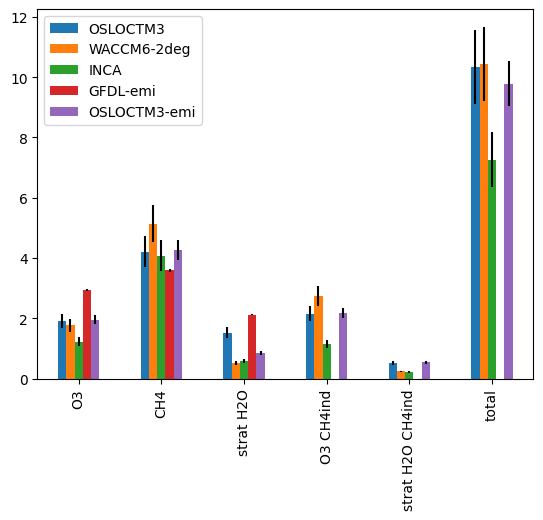

In [67]:
df_h2_gwp_udf_nom_df.plot.bar(yerr=df_h2_gwp_udf_sd_df)

In [ ]:
antmod = len(df_h2_agwp_ch4.index)
df_ch4_gwp = pd.DataFrame(np.empty([4,antmod])*np.nan,columns=df_h2_agwp_ch4.index,
                         index=['O3','CH4','strat H2O','H2'])
df_ch4_gwp_ua = unumpy.uarray(df_ch4_gwp, 0)

df_ch4_gwp_udf = pd.DataFrame(df_ch4_gwp_ua, columns=df_h2_agwp_ch4.index,
                         index=['O3','CH4','strat H2O','H2'])
df_ch4_gwp_udf

#df_ch4_gwp

In [ ]:
df_ch4_agwp_o3 = df_ozone_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_ch4_flux
df_ch4_agwp_o3.name = 'ch4_agwp_o3'



In [ ]:
df_ch4_agwp_o3/agwp100_CO2 

In [ ]:
df_ch4_gwp_udf.loc['O3'] =df_ch4_agwp_o3/agwp100_CO2
df_ch4_gwp_udf

In [ ]:
df_ch4_agwp =df_surf_ch4_per_ch4_flux*spec_rf_ch4
df_ch4_agwp.name = 'ch4_agwp'

In [ ]:
df_ch4_agwp/agwp100_CO2 

In [ ]:
#Add Methane GWP:
df_ch4_gwp_udf.loc['CH4'] =df_ch4_agwp/agwp100_CO2 

In [ ]:
print(df_h2o_rf.loc['10CH4'])
df_ch4_agwp_h2o = df_h2o_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_ch4_flux
df_ch4_agwp_h2o.name = 'ch4_agwp_h2o'

In [ ]:
df_ch4_gwp_udf.loc['strat H2O'] = df_ch4_agwp_h2o/agwp100_CO2

In [ ]:
df_ch4_gwp_udf.loc['H2'] = df_h2_flux_per_ch4_flux*df_h2_gwp.sum()

In [ ]:
#Save to file:
#print(outputpath + 'table_h2_gwp.csv')
#df_h2_gwp.to_csv(outputpath + 'table_h2_gwp.csv')
#df_h2_gwp.loc['total']=df_h2_gwp.sum()
df_h2_gwp_udf

In [ ]:
#df_ch4_gwp.to_csv(outputpath + 'table_ch4_gwp.csv')
#df_ch4_gwp.loc['total']=df_ch4_gwp.sum()
df_ch4_gwp_udf

In [ ]:
df_per_flux_h2 = pd.concat([df_h2_flux.loc['deltaH2'],df_surf_h2_per_h2_flux,
                            df_surf_ch4_per_h2_flux,df_ch4_flux_per_h2_flux,df_ch4_rf_per_h2_flux,
                            df_trop_du_ozone_per_h2_flux,df_strat_du_ozone_per_h2_flux,
                            df_strat_du_6060_ozone_per_h2_flux,df_strat_du_gt60_ozone_per_h2_flux,
                            df_ozone_rf_per_h2_flux,df_h2o_rf_per_h2_flux],axis=1, sort=False)

#Save to file:
#df_per_flux_h2.to_csv(outputpath + 'table_per_flux_h2.csv')

#Rename the columns:
columns_names={'deltaH2':'Flux H2 [Tg/yr]',
               'surf_h2_per_h2_flux': 'Surf. conc. H2 per flux [ppb yr/Tg]',
               'surf_ch4_per_h2_flux':'Surf. conc. CH4 per flux [ppb yr/Tg]',
               'ch4_flux_per_h2_flux':'Flux CH4/Flux H2 [Tg CH4/Tg H2]',
               'ch4_rf_per_h2_flux':'CH4 RF per flux [mW m-2 yr/ Tg]',
               'trop_du_ozone_per_h2_flux':'Trop. ozone per flux [DU yr/Tg]',
               'strat_du_ozone_per_h2_flux':'Strat. ozone per flux [DU yr/Tg]',
               'strat_du_6060_ozone_per_h2_flux':'Strat. ozone 60S-60N per flux [DU yr/Tg]',
               'strat_du_gt60_ozone_per_h2_flux':'Strat. ozone >60S/N per flux [DU yr/Tg]',
               'ozone_rf_per_h2_flux':'ozone RF per flux [mW m-2 yr/ Tg]',
               'h2o_rf_per_h2_flux':'Strat. H2O RF per flux [mW m-2 yr/ Tg]'}
#Rename column names:
df_per_flux_h2.rename(columns=dict(columns_names),inplace=True) #[df_per_flux_h2.columns])
df_per_flux_h2

In [ ]:
df_per_flux_ch4 = pd.concat([df_ch4_flux.loc['deltaCH4'],df_surf_ch4_per_ch4_flux,
                            df_h2_flux_per_ch4_flux,df_trop_du_ozone_per_ch4_flux,df_strat_du_ozone_per_ch4_flux,
                            df_strat_du_6060_ozone_per_ch4_flux,df_strat_du_gt60_ozone_per_ch4_flux,
                            df_ozone_rf_per_ch4_flux,df_h2o_rf_per_ch4_flux],axis=1,sort=False)



               
#Save to file:
#df_per_flux_ch4.to_csv(outputpath + 'table_per_flux_ch4.csv')

#Rename the columns:
columns_names={'deltaCH4':'Flux CH4 [Tg/yr]',
               'surf_ch4_per_ch4_flux':'Surf. conc. CH4 per flux [ppb yr/Tg]',
               'h2_flux_per_ch4_flux':'Flux H2/Flux CH4 [Tg H2/Tg CH4]',
               'trop_du_ozone_per_ch4_flux':'Trop. ozone per flux [DU yr/Tg]',
               'strat_du_ozone_per_ch4_flux':'Strat. ozone per flux [DU yr/Tg]',
               'strat_du_6060_ozone_per_ch4_flux':'Strat. ozone 60S-60N per flux [DU yr/Tg]',
               'strat_du_gt60_ozone_per_ch4_flux':'Strat. ozone >60S/N per flux [DU yr/Tg]',
               'ozone_rf_per_ch4_flux':'ozone RF per flux [mW m-2 yr/ Tg]',
               'h2o_rf_per_ch4_flux':'Strat H2O RF per flux [mW m-2 yr/ Tg]'}
               
#Rename column names:
df_per_flux_ch4.rename(columns=dict(columns_names),inplace=True) #[df_per_flux_h2.columns])
df_per_flux_ch4          

In [ ]:
df_budget_h2 = pd.concat([df_h2_burden.loc['CTRL'],df_h2_lifetime.loc['CTRL'],
                          df_h2_atmloss.loc['CTRL'],df_h2_drydep.loc['CTRL'],
                          df_h2_atmprod.loc['CTRL'],df_h2_atm_lifetime.loc['CTRL'],
                          df_h2_estemis],axis=1)

df_budget_h2.columns = ['H2 burden [Tg]',
                        'H2 lifetime [yrs]',
                        'H2 atm.loss[Tg/yr]',
                        'H2 drydep [Tg/yr]',
                        'H2 atm. prod [Tg/yr]',
                        'H2 atmospheric lifetime [yrs]',
                        'H2 estimated emissions [Tg/yr]']

#df_budget_h2.to_csv(outputpath + 'table_budget_h2.csv')
df_budget_h2

In [ ]:
df_budget_ch4 = pd.concat([df_ch4_burden.loc['CTRL'],df_ch4_lifetime.loc['CTRL'],
                           df_ch4_loss.loc['CTRL']],axis=1)
df_budget_ch4.columns = ['CH4 burden [Tg]','CH4 lifetime [yrs]','CH4 atm.loss[Tg/yr]'] 
df_budget_ch4

In [ ]:
df_ch4_burden_per_conc  = df_ch4_burden.loc['deltaCH4']/df_ch4_surfconc.loc['deltaCH4']
df_ch4_burden_per_conc.name = 'ch4_burden_per_conc'
df_ch4_burden_per_conc

In [ ]:
df_w_o_feedback =df_ch4_lifetime.loc['CTRL']/df_ch4_burden_per_conc #Lifetime [yr] / [Tg/ppb] 
df_w_o_feedback

In [ ]:
df_feedback_factor_ch4 = df_surf_ch4_per_ch4_flux/df_w_o_feedback
df_feedback_factor_ch4.name = 'feedback_factor_ch4'
df_feedback_factor_ch4

In [ ]:
df_h2_burden_per_conc  = df_h2_burden.loc['deltaH2']/df_h2_surfconc.loc['deltaH2']
df_h2_burden_per_conc.name = 'h2_burden_per_conc'
df_h2_burden_per_conc

In [ ]:
df_w_o_feedback_h2 =df_h2_lifetime.loc['CTRL']/df_h2_burden_per_conc #Lifetime [yr] / [Tg/ppb] 
df_w_o_feedback_h2

In [ ]:
df_feedback_factor_h2 = df_surf_h2_per_h2_flux/df_w_o_feedback_h2
df_feedback_factor_h2.name = 'feedback_factor_h2'
df_feedback_factor_h2
#Fabien wrote in the paper about feedback factor less than 1.